Pandas

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [48]:
data = pd.read_excel('titanic.xls')
data.shape

(1309, 14)

In [49]:
data.columns # les entete des colonnes

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [50]:
data.head()#visualisé les données

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [51]:
#Boolean indexing
data[data['age']< 16]['pclass'].value_counts()

3    79
2    28
1     8
Name: pclass, dtype: int64

In [52]:
data[data['age'] < 16].groupby(['sex','pclass']).mean()

survived        age     sibsp     parch        fare   body
sex    pclass                                                            
female 1       0.666667  10.333333  0.666667  1.666667  160.962500    NaN
       2       1.000000   7.182294  0.750000  1.312500   30.092450    NaN
       3       0.513514   6.463965  1.540541  1.135135   19.359573  328.0
male   1       1.000000   6.983340  0.800000  2.000000  150.056660    NaN
       2       0.916667   3.694442  0.750000  1.166667   30.521183    NaN
       3       0.309524   6.984126  2.523810  1.309524   25.565376   24.0

In [53]:
data.iloc[0,2] #localisation  de la celule

'Allen, Miss. Elisabeth Walton'

In [54]:
data.iloc[0:4,0:5]# indique les colonne qui l'interesse et les colonnes

,pclass,survived,name,sex,age
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000


In [55]:
data.loc[0:4,['age','name']]# indique les colonnes qui l'interesse entre la ligne 0 et la ligne 4 avec les colonnes age et name

,age,name
0,29.0000,"Allen, Miss. Elisabeth Walton"
1,0.9167,"Allison, Master. Hudson Trevor"
2,2.0000,"Allison, Miss. Helen Loraine"
3,30.0000,"Allison, Mr. Hudson Joshua Creighton"
4,25.0000,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"


In [ ]:
#data = data.set_index('name')

EXERCICE :

AgeCat0 : < 20ans
AgeCat1 : 20 - 30 ans
AgeCat2 : 30 - 40 ans
AgeCat3 : + 40 ans

In [65]:
data['categorie_age'] = ''
data.loc[data['age'] < 20, 'categorie_age'] = 'vingtaine'
data.loc[(data["age"] >= 20)&(data["age"] <30), 'categorie_age'] = 'trentaine'
data.loc[(data["age"] >= 30)&(data["age"] <40), 'categorie_age'] = 'quarantaine'
data.loc[data["age"] >= 40, 'categorie_age'] = 'plus_de_quarante'
 


In [67]:
data
data['categorie_age'].value_counts()# afiche les categories et le nombre d'entré


trentaine           344
                    263
plus_de_quarante    245
quarantaine         232
vingtaine           225
Name: categorie_age, dtype: int64

<AxesSubplot:>

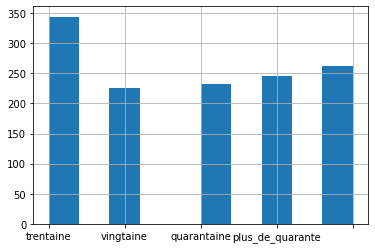

In [68]:
data['categorie_age'].hist()

In [5]:
data = data.drop([ 'name', 'sibsp', 'parch', 'ticket','fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],axis=1) #selectiion des colonnes et les suprimer

In [6]:
#Analyse
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [7]:
#Analyse
data.describe() # c'est des statistiques sur les données

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [8]:
#1/ datafillna(data['age'].mean())
#2/ data.dropna(axis=0)
data = data.dropna(axis=0)

In [9]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [10]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

<AxesSubplot:>

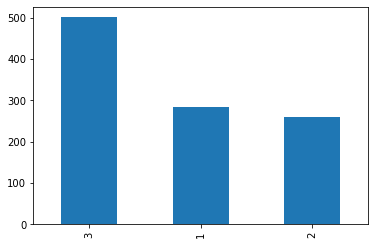

In [11]:
data['pclass'].value_counts().plot.bar()# on peut utilisé les meme fonction de matpolib

<AxesSubplot:>

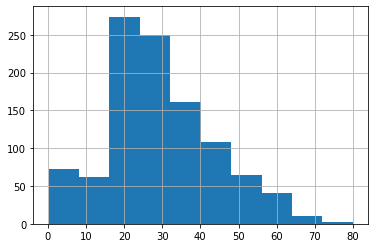

In [12]:
data['age'].hist()#affiche un histograme des age

In [13]:
data['survived'].value_counts()

0    619
1    427
Name: survived, dtype: int64

In [14]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [15]:
data.groupby(['sex','pclass']).mean()#fait des categories ou groupe

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

Serie, liste--->DF Tableau Numpy
DataFrama